<center><h1><font color='green'>EDA with Datalab - Example </font></h1></center>


<h2>06_01.Loading Data into Dataframe</h2>

In [59]:
#import BigQuery library
import google.datalab.bigquery as bq

#create a query object
campaign_query = bq.Query('SELECT * FROM EDA.campaigns')

#Execute the query and create a results object
output_options = bq.QueryOutput.table(use_cache=False)
raw_records = campaign_query.execute(output_options=output_options).result()

#Convert the results objects to a dataframe
source_df = raw_records.to_dataframe()
print('Data type :')
source_df.dtypes


Data type :


OFFER_DATE     object
OFFER_WEEK     object
OFFER_MONTH    object
PRODUCT        object
PRICE           int64
DISCOUNT        int64
CUSTOMER_ID    object
GENDER         object
AGE            object
EARNING_K      object
CONVERT         int64
dtype: object

In [60]:
print('Source Data :')
source_df.head()

Source Data :


,OFFER_DATE,OFFER_WEEK,OFFER_MONTH,PRODUCT,PRICE,DISCOUNT,CUSTOMER_ID,GENDER,AGE,EARNING_K,CONVERT
0,2017-09-01,Friday,September,HDMI Cable,30,30,83-191-4407,Male,30 - 40,30 - 60,0
1,2017-09-01,Friday,September,HDMI Cable,30,20,43-121-0232,Male,50 - 60,100 - 150,0
2,2017-09-08,Friday,September,USB Drive,30,30,57-751-5485,Male,60 and above,LESS THAN 30,0
3,2017-09-08,Friday,September,USB Hub,30,20,71-350-6940,Male,60 and above,LESS THAN 30,0
4,2017-01-06,Friday,January,Lightning Cable,30,20,00-825-1813,Male,50 - 60,60 - 100,0


<h2>06_02.Cleansing and Transforming Data</h2>

In [62]:
import numpy as np
import pandas as pd

#Convert Gender and Age into indicator variables
source_df = pd.concat([source_df, pd.get_dummies(source_df['GENDER'],prefix='Gender')],axis=1)                        
source_df = pd.concat([source_df, pd.get_dummies(source_df['AGE'],prefix='Age')], axis=1)
source_df = pd.concat([source_df, pd.get_dummies(source_df['DISCOUNT'],prefix='Discount')], axis=1)

source_df.head()


,OFFER_DATE,OFFER_WEEK,OFFER_MONTH,PRODUCT,PRICE,DISCOUNT,CUSTOMER_ID,GENDER,AGE,EARNING_K,...,Age_20 - 30,Age_30 - 40,Age_40 - 50,Age_50 - 60,Age_60 and above,Discount_20,Discount_30,Discount_40,Discount_50,Discount_60
0,2017-09-01,Friday,September,HDMI Cable,30,30,83-191-4407,Male,30 - 40,30 - 60,...,0,1,0,0,0,0,1,0,0,0
1,2017-09-01,Friday,September,HDMI Cable,30,20,43-121-0232,Male,50 - 60,100 - 150,...,0,0,0,1,0,1,0,0,0,0
2,2017-09-08,Friday,September,USB Drive,30,30,57-751-5485,Male,60 and above,LESS THAN 30,...,0,0,0,0,1,0,1,0,0,0
3,2017-09-08,Friday,September,USB Hub,30,20,71-350-6940,Male,60 and above,LESS THAN 30,...,0,0,0,0,1,1,0,0,0,0
4,2017-01-06,Friday,January,Lightning Cable,30,20,00-825-1813,Male,50 - 60,60 - 100,...,0,0,0,1,0,1,0,0,0,0


<h2>06_03.Statistics and Correlations </h2>

In [63]:
source_df.describe()

,PRICE,DISCOUNT,CONVERT,Gender_Female,Gender_Male,Age_20 - 30,Age_30 - 40,Age_40 - 50,Age_50 - 60,Age_60 and above,Discount_20,Discount_30,Discount_40,Discount_50,Discount_60
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.080000,39.628000,0.190600,0.516400,0.483600,0.20020,0.198200,0.20020,0.199400,0.202000,0.201800,0.206800,0.205400,0.198800,0.187200
std,8.222355,14.002172,0.392814,0.499781,0.499781,0.40019,0.398684,0.40019,0.399589,0.401532,0.401384,0.405051,0.404034,0.399137,0.390111
min,30.000000,20.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,30.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,40.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,50.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,60.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h4>Correlations</h4>

In [64]:
source_df.corr()['CONVERT']

PRICE              -0.001625
DISCOUNT            0.111091
CONVERT             1.000000
Gender_Female       0.028399
Gender_Male        -0.028399
Age_20 - 30         0.312034
Age_30 - 40         0.085728
Age_40 - 50        -0.126985
Age_50 - 60        -0.140223
Age_60 and above   -0.130005
Discount_20        -0.085405
Discount_30        -0.021474
Discount_40        -0.000941
Discount_50         0.021108
Discount_60         0.089548
Name: CONVERT, dtype: float64

<h2>06_04.Segmentation and Profiling</h2>

<h4>Conversions by Discount Offered</h4>

In [160]:
#Aggregate by conversion by offer discount
convert_df=source_df.groupby(['DISCOUNT'],as_index=False)['CONVERT'].sum()
offer_df=source_df.groupby(['DISCOUNT'],as_index=False)['CONVERT'].count()
offer_df.columns=['DISCOUNT','OFFERS']

discount_df = pd.concat([convert_df, offer_df['OFFERS']],axis=1)
discount_df['CONV_PERCENT'] = discount_df['CONVERT'] / discount_df['OFFERS'] * 100
discount_df['CONV_PERCENT'] = np.round(discount_df['CONV_PERCENT'],2)
print(discount_df)

   DISCOUNT  CONVERT  OFFERS  CONV_PERCENT
0        20      125    1009         12.39
1        30      180    1034         17.41
2        40      195    1027         18.99
3        50      206     994         20.72
4        60      247     936         26.39


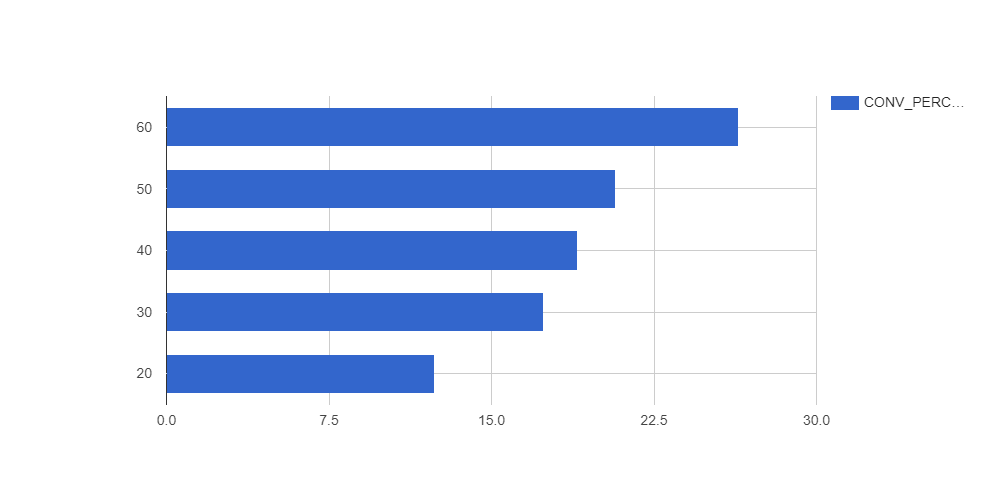

In [145]:
%%chart bars --fields DISCOUNT,CONV_PERCENT --data discount_df
height: 500

<h2>06_05.Writing results to Cloud Storage</h2>

In [158]:
from StringIO import StringIO
csvObject = StringIO()
discount_df.to_csv(csvObject)
csvString = csvObject.getvalue()
print(csvString)

,DISCOUNT,CONVERT,OFFERS,CONV_PERCENT
0,20,125,1009,12.39
1,30,180,1034,17.41
2,40,195,1027,18.99
3,50,206,994,20.72
4,60,247,936,26.39



In [159]:
%%gcs write --variable csvString --object 'gs://test-kumaran-20180722110291/write_csv.csv'